In [4]:
import os
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
plt.rcParams["figure.figsize"] = (8, 5)
plt.rcParams["axes.grid"] = True

In [6]:
IMAGES_DIR = Path("images")
IMAGES_DIR.mkdir(exist_ok=True)

In [7]:
CSV_PATH = Path("netflix_titles.csv")

In [8]:
if not CSV_PATH.exists():
    raise FileNotFoundError(
        f"Could not find {CSV_PATH}. "
        "Please download 'netflix_titles.csv' from Kaggle and place it in this folder."
    )

In [9]:
df = pd.read_csv(CSV_PATH, encoding="utf-8")


In [10]:
print("Rows, Columns:", df.shape)
print("\nColumns:", list(df.columns))

Rows, Columns: (8807, 12)

Columns: ['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']


In [11]:
display(df.head(3))

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


In [12]:
na_counts = df.isna().sum().sort_values(ascending=False)
display(na_counts.head(10))

director        2634
country          831
cast             825
date_added        10
rating             4
duration           3
show_id            0
type               0
title              0
release_year       0
dtype: int64

In [13]:
df_clean = df.copy()

In [14]:
display(df_clean)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [15]:
for col in df_clean.select_dtypes(include="object").columns:
    df_clean[col] = df_clean[col].astype(str).str.strip()

In [16]:
df_clean["date_added"] = pd.to_datetime(df_clean["date_added"], errors="coerce")


In [17]:
display(df_clean)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,nan,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,nan,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",nan,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,nan,nan,nan,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,nan,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,nan,nan,nan,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [18]:
for col in ["director", "cast", "country", "rating"]:
    if col in df_clean.columns:
        df_clean[col] = df_clean[col].fillna("Unknown").replace({"nan": "Unknown"})

In [19]:
df_clean["type"] = df_clean["type"].str.title()

In [20]:
before_type = df_clean["type"].copy()

In [21]:
df_clean["type"] = df_clean["type"].str.lower()


In [22]:
changed_rows = pd.DataFrame({
    "Before": before_type,
    "After": df_clean["type"]
})

In [23]:
changed_rows = changed_rows[changed_rows["Before"] != changed_rows["After"]]

print(changed_rows)

       Before    After
0       Movie    movie
1     Tv Show  tv show
2     Tv Show  tv show
3     Tv Show  tv show
4     Tv Show  tv show
...       ...      ...
8802    Movie    movie
8803  Tv Show  tv show
8804    Movie    movie
8805    Movie    movie
8806    Movie    movie

[8807 rows x 2 columns]


In [24]:
def first_or_unknown(x: str) -> str:
    if not x or x == "Unknown":
        return "Unknown"
    return x.split(",")[0].strip()

In [25]:
df_clean["primary_genre"] = df_clean["listed_in"].apply(lambda s: s.split(",")[0].strip() if isinstance(s, str) else "Unknown")


In [26]:
def duration_to_int(text: str) -> int:
    try:
        return int(text.split()[0])
    except Exception:
        return None

def duration_type(text: str) -> str:
    if isinstance(text, str):
        parts = text.split()
        if len(parts) > 1:
            return parts[1].lower() 
    return "unknown"

df_clean["duration_int"] = df_clean["duration"].apply(duration_to_int)
df_clean["duration_type"] = df_clean["duration"].apply(duration_type)


In [27]:
df_clean.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,primary_genre,duration_int,duration_type
0,s1,movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Documentaries,90.0,min
1,s2,tv show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",International TV Shows,2.0,seasons
2,s3,tv show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Crime TV Shows,1.0,season


In [28]:
type_counts = df_clean["type"].value_counts().sort_index()
display(type_counts)

type
movie      6131
tv show    2676
Name: count, dtype: int64

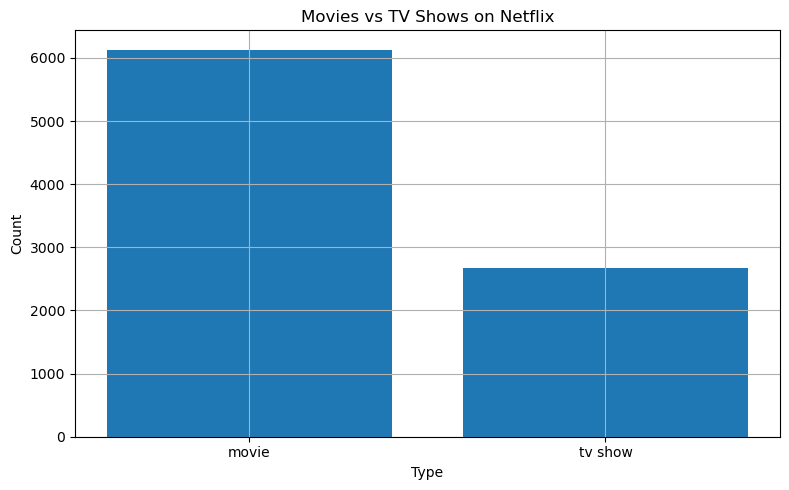

In [29]:
plt.figure()
plt.bar(type_counts.index, type_counts.values)
plt.title("Movies vs TV Shows on Netflix")
plt.xlabel("Type")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig(IMAGES_DIR / "movies_vs_tvshows.png", dpi=150)
plt.show()

In [30]:
countries_series = (
    df_clean["country"]
    .replace("Unknown", pd.NA)
    .dropna()
    .str.split(",")
    .explode()
    .str.strip()
)




country
United States     3690
India             1046
United Kingdom     806
Canada             445
France             393
Japan              318
Spain              232
South Korea        231
Germany            226
Mexico             169
Name: count, dtype: int64

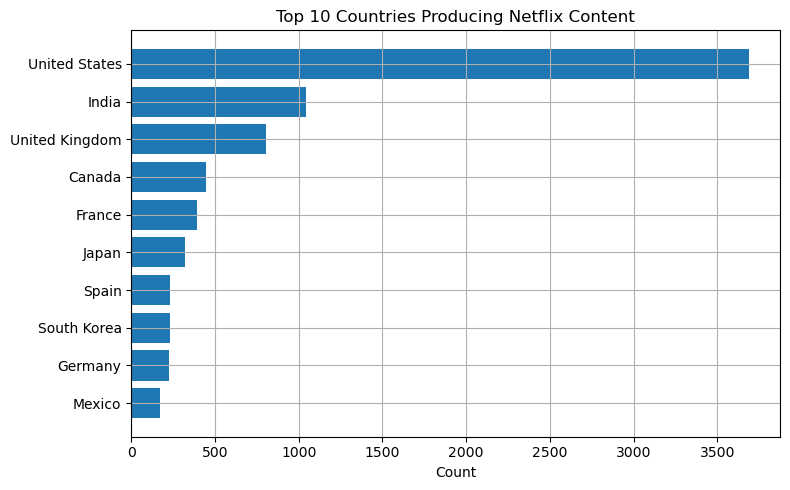

In [31]:
country_counts = countries_series.value_counts().head(10)
display(country_counts)

plt.figure()
plt.barh(country_counts.index[::-1], country_counts.values[::-1])
plt.title("Top 10 Countries Producing Netflix Content")
plt.xlabel("Count")
plt.tight_layout()
plt.savefig(IMAGES_DIR / "top_countries.png", dpi=150)
plt.show()

release_year
2012     237
2013     288
2014     352
2015     560
2016     902
2017    1032
2018    1147
2019    1030
2020     953
2021     592
Name: count, dtype: int64

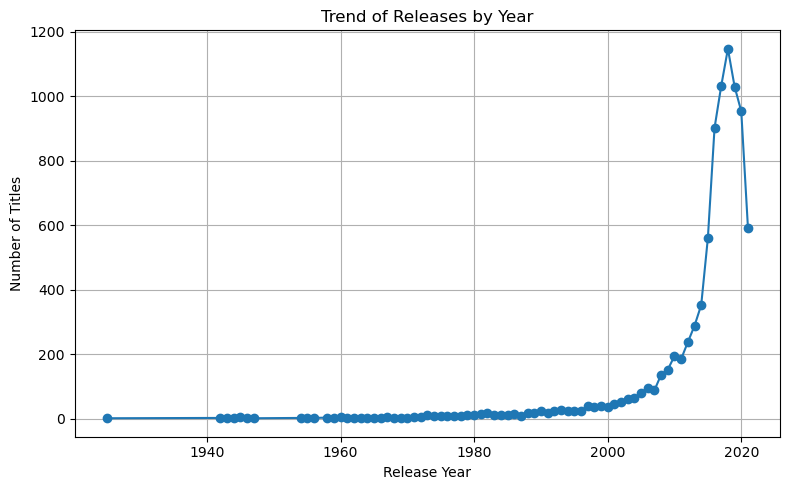

In [34]:
year_counts = (
    df_clean["release_year"]
    .dropna()
    .astype(int)
    .value_counts()
    .sort_index()
)

display(year_counts.tail(10))

plt.figure()
plt.plot(year_counts.index, year_counts.values, marker="o")
plt.title("Trend of Releases by Year")
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")
plt.tight_layout()
plt.savefig(IMAGES_DIR / "release_trend.png", dpi=150)
plt.show()

In [36]:
summary = {}

summary["total_rows"] = int(len(df_clean))
summary["n_movies"] = int((df_clean["type"] == "Movie").sum())
summary["n_tvshows"] = int((df_clean["type"] == "Tv Show").sum() + (df_clean["type"] == "TV Show").sum())

summary["top_country"] = country_counts.index[0] if len(country_counts) else "N/A"

# Safe latest year logic
latest_release_year = df_clean["release_year"].dropna().astype(int).max()
summary["latest_release_year"] = int(latest_release_year) if pd.notna(latest_release_year) else "N/A"

summary


{'total_rows': 8807,
 'n_movies': 0,
 'n_tvshows': 0,
 'top_country': 'United States',
 'latest_release_year': 2021}